#DA EXP1 EDA
**Name : Niranjan Badhe**

**UID : 2019120004**

**BE EXTC**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import datetime

Inference : Importing libraries.

In [33]:
sales=pd.read_csv('/content/walmart-sales-dataset-of-45stores.csv')

Inference : Reading the csv file.

In [34]:
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Inference : Displaying the first five rows of the dataframe.

In [35]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Inference : printing information about the DataFrame.

In [36]:
sales.describe(include = 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


Inference : All columns of the input will be included in the output.

In [37]:
sales['Date']=pd.to_datetime(sales['Date'])
sales['Year']=sales['Date'].dt.year
sales['Month']=sales['Date'].dt.month
sales['Day']=sales['Date'].dt.day
sales['MonthYear_value'] = sales['Date'].dt.to_period('M')
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,MonthYear_value
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2010-05


Inference : Separating day, month and year and making new columns for it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7e4d03f10>,
      dtype=object)

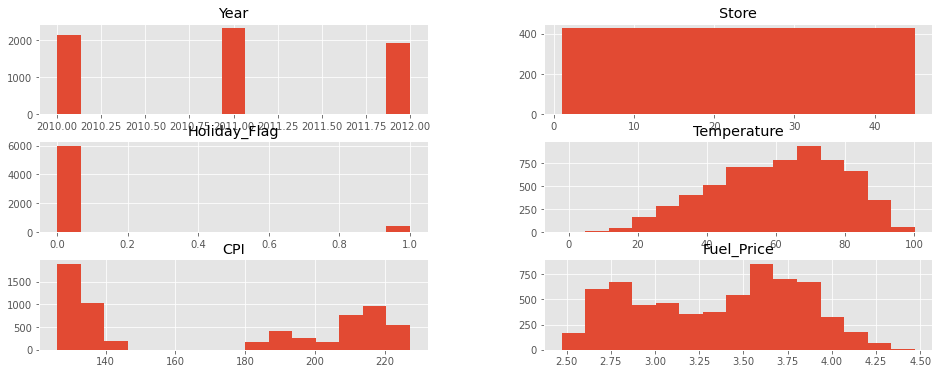

In [38]:
sales[['Year', 'Store', 'Holiday_Flag','Temperature','CPI','Fuel_Price']].hist(bins=15, figsize=(16, 6))

Inference : Ploting histogram for the attributes.

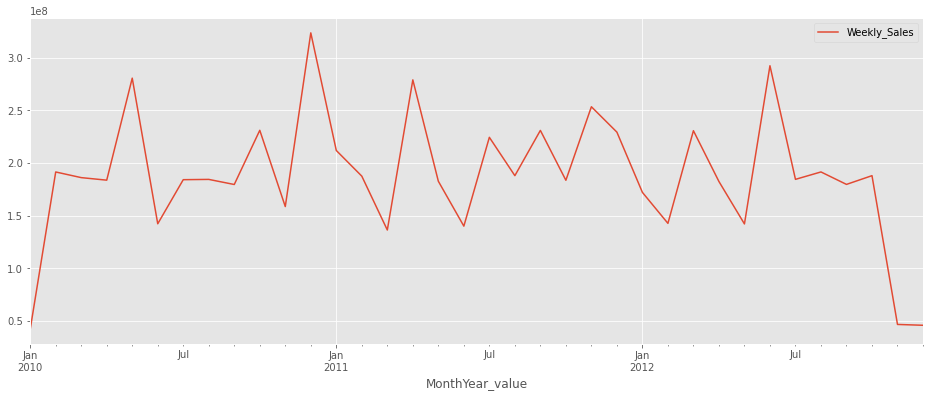

In [39]:
sales_year = sales.groupby(['MonthYear_value']).sum()
sales_year[['Weekly_Sales']].plot(figsize=(16, 6), subplots=True);

Inference : Ploting weekly sales w.r.t *months*

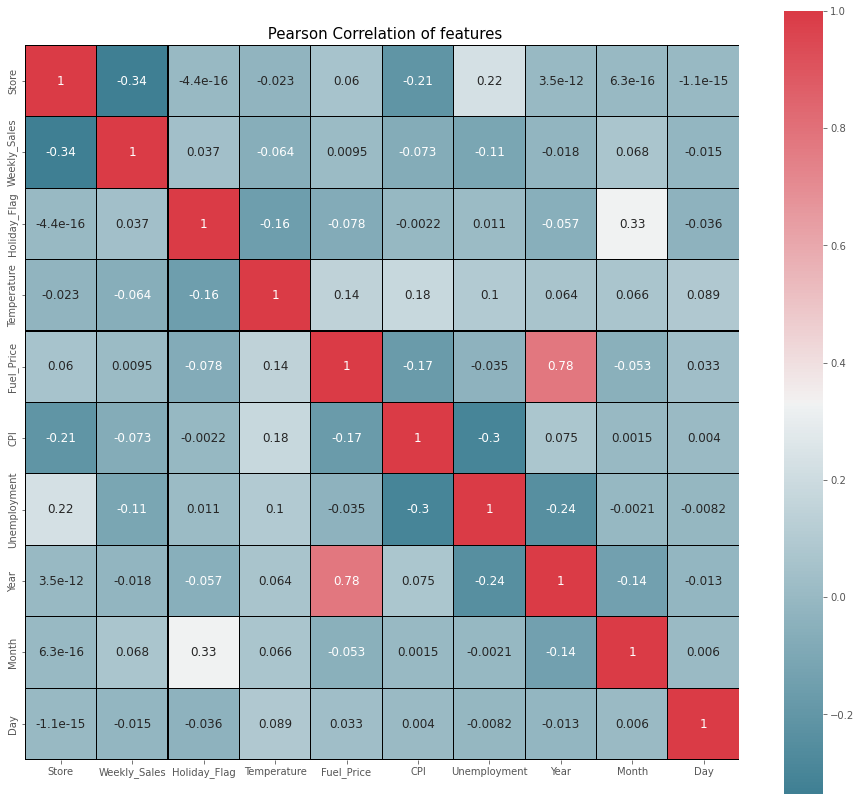

In [40]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize = (16,16))
    colormap = sns.diverging_palette(220 , 10 , as_cmap = True)
    
    _  = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square = True,
        cbar_kws = {'shrink' : 0.9},
        ax = ax,
        annot = True, 
        linewidths = 0.1 , vmax = 1.0 , linecolor = 'black',
        annot_kws = {'fontsize' : 12}
    )
    
    plt.title(' Pearson Correlation of features' , y = 1.05 , size = 15) 
    
correlation_heatmap(sales)

Inference : Ploting correlation heatmap of dataset

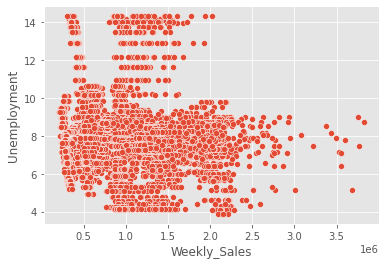

In [55]:
sns.scatterplot(data=sales, x='Weekly_Sales', y='Unemployment');

Inference : Ploting scatter plot between weekly sales and unmployment


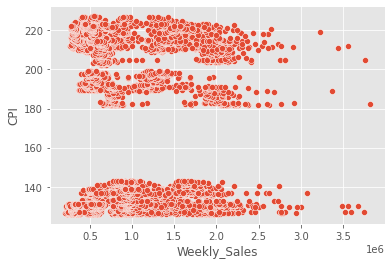

In [56]:
sns.scatterplot(data=sales, x='Weekly_Sales', y='CPI');

Inference : Ploting scatter plot between weekly sales and CPI

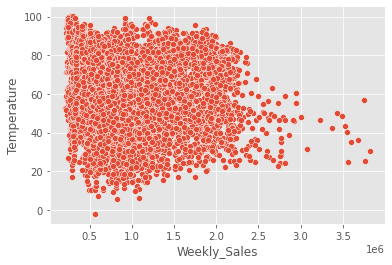

In [58]:
sns.scatterplot(data=sales, x='Weekly_Sales', y='Temperature');

Inference : Ploting scatter plot between weekly sales and Temperature

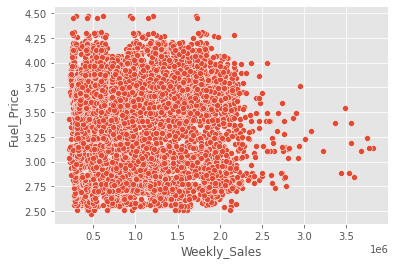

In [59]:
sns.scatterplot(data=sales, x='Weekly_Sales', y='Fuel_Price');

Inference : Ploting scatter plot between weekly sales and Fuel Price

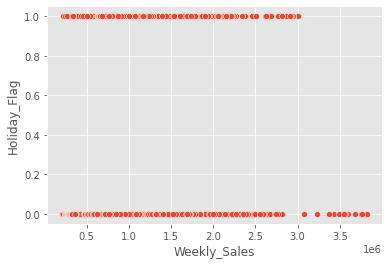

In [60]:
sns.scatterplot(data=sales, x='Weekly_Sales', y='Holiday_Flag');

Inference : Ploting scatter plot between weekly sales and Holiday

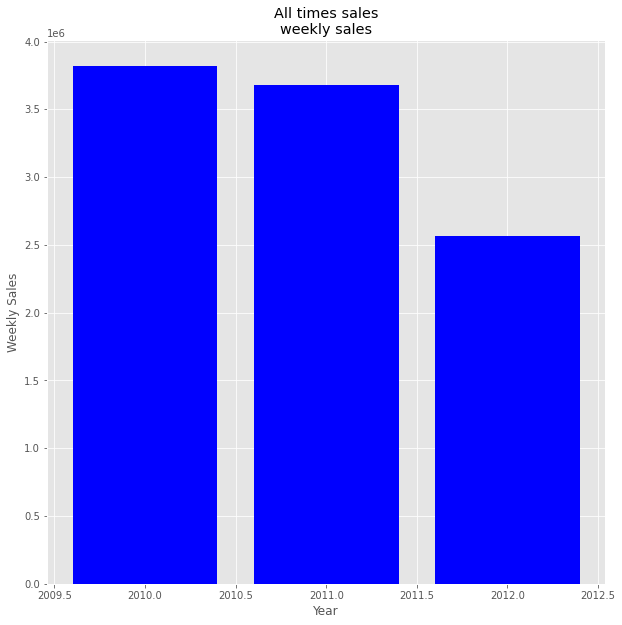

In [44]:
# Create figure and plot space
matplotlib.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 10))
# Add x-axis and y-axis
ax.bar(sales['Year'],
        sales['Weekly_Sales'],
        color='blue')

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="Weekly Sales",
       title="All times sales\nweekly sales")

plt.show()

Inference : Ploting bar graph for sales per year.

In [47]:
sales_2010=pd.DataFrame(sales[sales['Year']==2010])
sales_2011=pd.DataFrame(sales[sales['Year']==2011])
sales_2012=pd.DataFrame(sales[sales['Year']==2012])

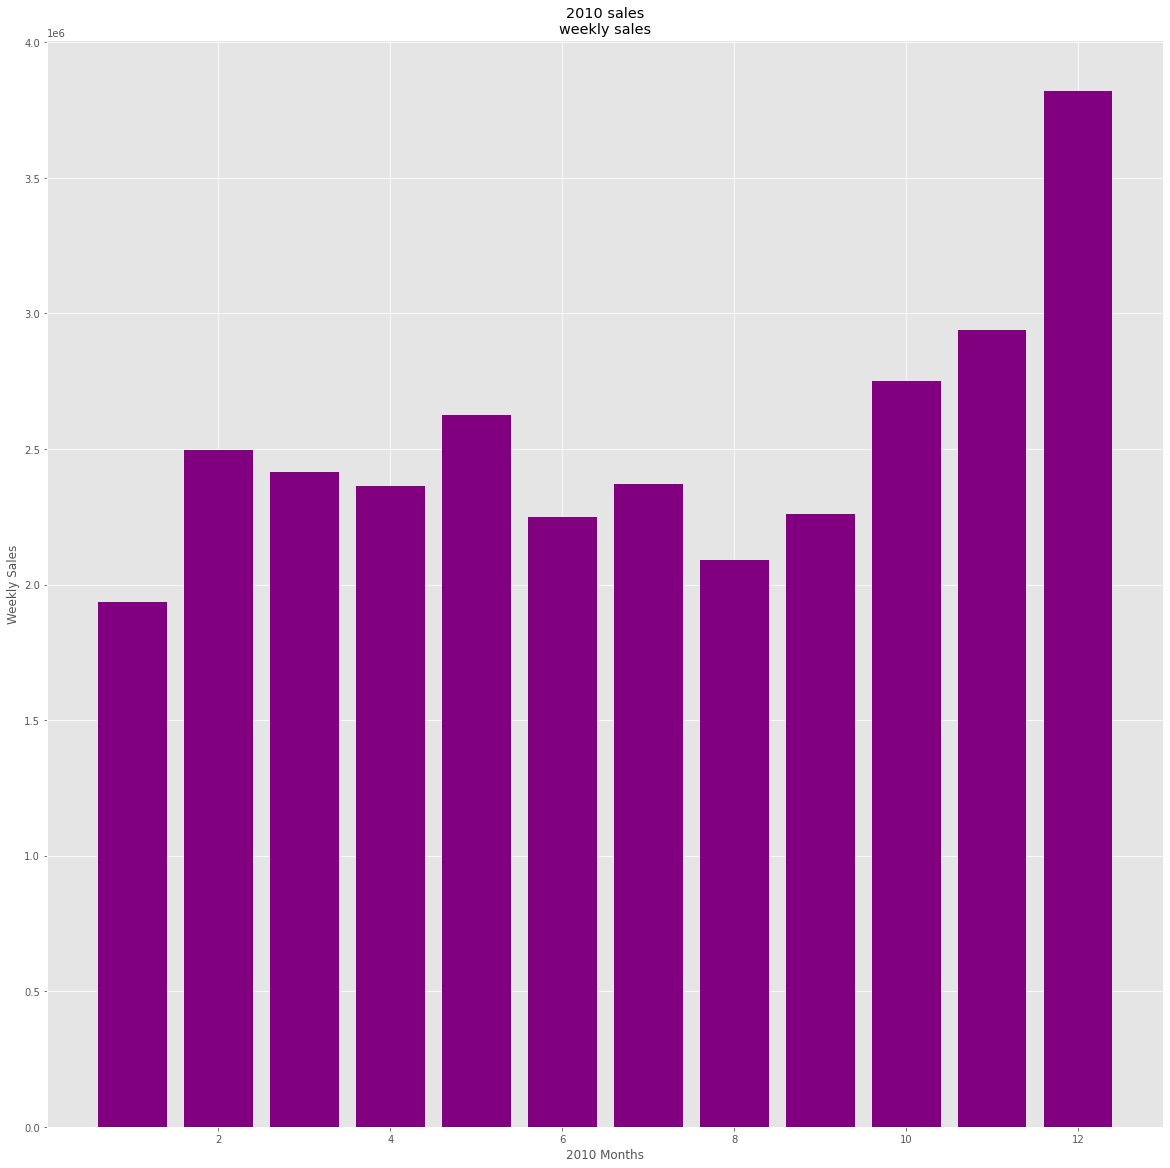

In [48]:
# Create figure and plot space
matplotlib.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 20))
# Add x-axis and y-axis
ax.bar(sales_2010['Month'],
        sales_2010['Weekly_Sales'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="2010 Months",
       ylabel="Weekly Sales",
       title="2010 sales\nweekly sales")
plt.show()

Inference : Ploting bar graph for sales per month for 2010.

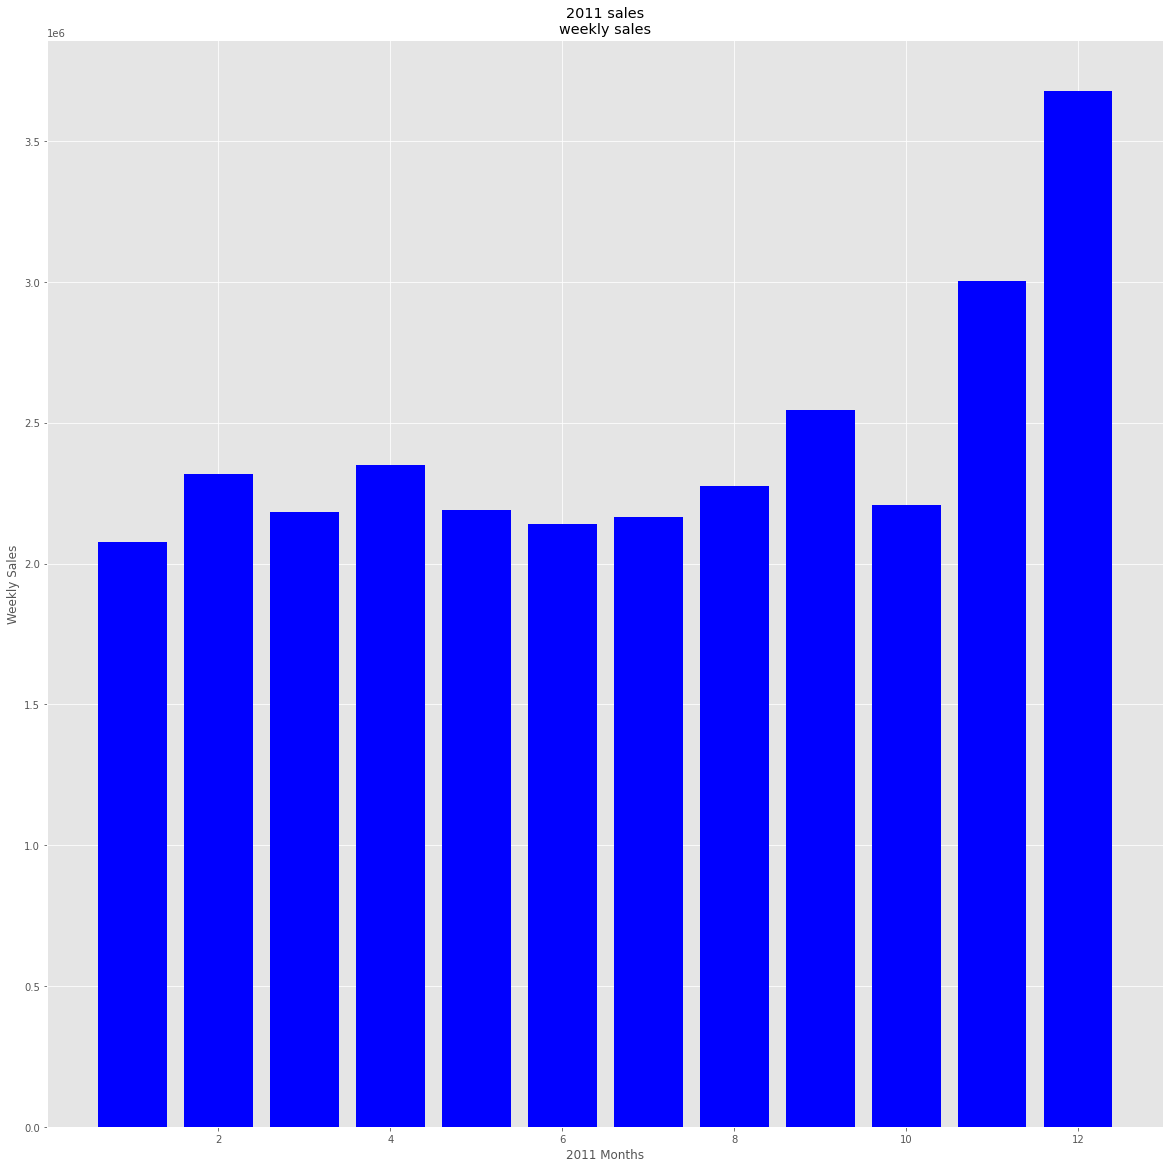

In [63]:
# Create figure and plot space
matplotlib.style.use('ggplot')
fig1, ax1 = plt.subplots(figsize=(20, 20))
# Add x-axis and y-axis
ax1.bar(sales_2011['Month'],
        sales_2011['Weekly_Sales'],
        color='blue')

# Set title and labels for axes
ax1.set(xlabel="2011 Months",
       ylabel="Weekly Sales",
       title="2011 sales\nweekly sales")
plt.show()

Inference : Ploting bar graph for sales per month for 2011.

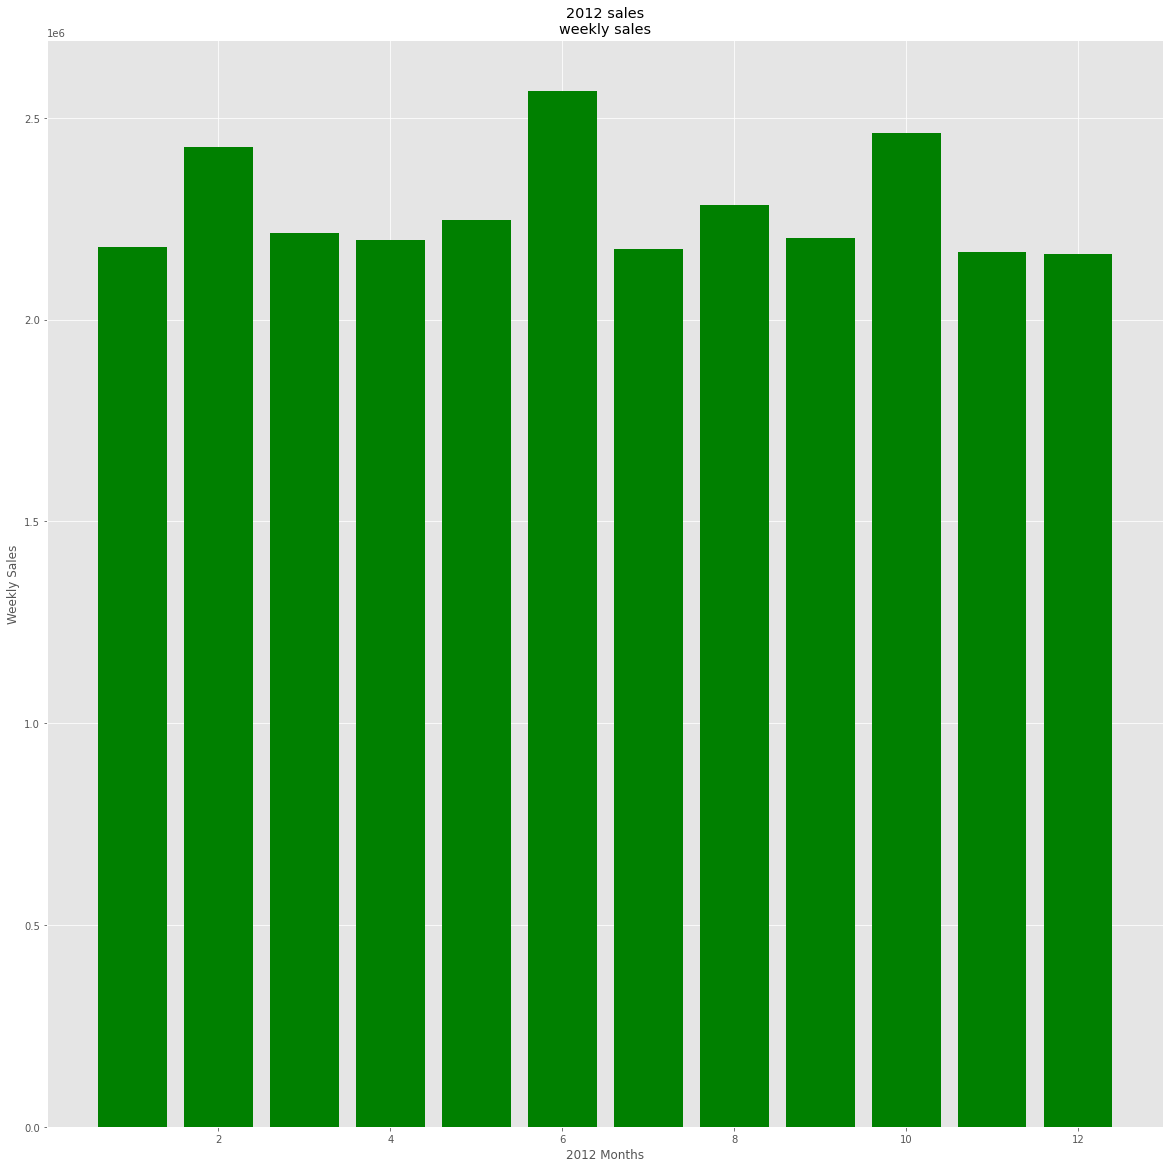

In [64]:
# Create figure and plot space

fig1, ax1 = plt.subplots(figsize=(20, 20))
# Add x-axis and y-axis
ax1.bar(sales_2012['Month'],
        sales_2012['Weekly_Sales'],
        color='green')

# Set title and labels for axes
ax1.set(xlabel="2012 Months",
       ylabel="Weekly Sales",
       title="2012 sales\nweekly sales")
plt.show()

Inference : Ploting bar graph for sales per month for 2012.

**Conclusion**



*   As we can see through the, a decrease in sales is observed when the unemployment increases
*  The sales is observed to be the highest during December. This might be because of the Christmas and New year holiday period.
*   Sales increase by the end of 2010 and 2011 but remain almost steady in 2012
*   Sales is observed to be deteriorating over time



